In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.optimize import curve_fit


In [5]:
df = pd.read_excel(r'/Users/anastasiailina/Desktop/jupiter/NKR3RT.xls')
#для mac (r'/Users/anastasiailina/Desktop/jupiter/NKR3RT.xls')
#для huawei (r'C:\NKR_PPMS.xls')

In [9]:
data = df.copy()

cols = ["T", "R"]
data.columns = ["T", "R"]
data_ = data.copy()
data_.head()

,T,R
0,NaN,NaN
1,4.21268,0.000062
2,4.35497,0.000110
3,4.55459,0.000083
4,4.68918,0.000112


In [10]:
T = np.array(data_["T"])
R = np.array(data_["R"])

In [11]:
T = T[~np.isnan(T)]
R = R[~np.isnan(R)]

1498


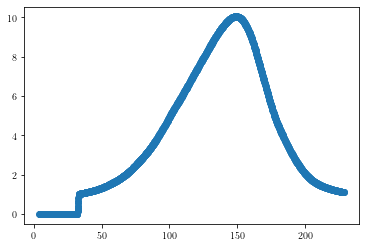

In [39]:
plt.scatter(T,R)
print(len(T))

In [13]:
T_ = np.delete(T, np.s_[0:206])
#T1 = np.delete(T_,np.s_[4703:5622])

In [14]:
print(len(T))

1498


In [16]:
R_ = np.delete(R, np.s_[0:206])
#R1 = np.delete(R_,np.s_[4703:5622])
R2 = R_/0.794

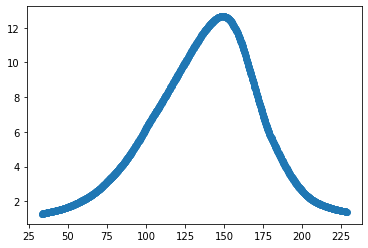

In [17]:
plt.scatter(T_,R2)

In [27]:
R0met=0.102
X = 0.3055*10**(-5)
n = 2.813
def Rmet(t,R0met,X,n):
    return 1/(R0met+X*t**n) 
#1 (0.102,0.3055*10**(-5),2.813,0.5,90,01,110)
#2 (8.91844815e-01, 1.98205230e-05, 2.70572811e+00, 4.05039795e-04, 3.05975869e+02, 3.79708942e-01, 3.06022736e+02)
#3 [8.91844530e-01, 1.98205238e-05, 2.70572812e+00, 4.05040333e-04, 3.05975915e+02, 3.79815356e-01, 3.05956213e+02]

In [32]:

def Rsemi(t, R0semi,Eg):
    return 1/(R0semi*np.exp(Eg*5.8/t))

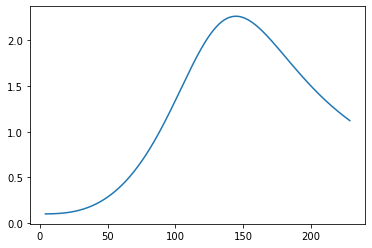

In [33]:
plt.plot(T, 1/(Rsemi(T, 0.5,90)+Rmet(T,R0met,X,n)+Rsemi(T,0.1,110)))

In [34]:
def func (x,a,b,c,d,e,f,g):
    return 1/(Rmet(x,a,b,c)+Rsemi(x,d,e)+Rsemi(x,f,g))

In [47]:
initial_guess = [8.91844815e-01, 1.98205230e-05, 2.70572811e+00, 4.05039795e-04, 3.05975869e+02, 3.79708942e-01, 3.06022736e+02] 

In [48]:
popt, pcov = curve_fit(func,T_,R2, p0=initial_guess)

print("Optimal parameters:", popt)

Optimal parameters: [8.91844530e-01 1.98205238e-05 2.70572812e+00 4.05040333e-04
 3.05975915e+02 3.79815356e-01 3.05956213e+02]


<ipython-input-32-688db358289a>:2: RuntimeWarning: overflow encountered in exp
  return 1/(R0semi*np.exp(Eg*5.8/t))
<ipython-input-32-688db358289a>:2: RuntimeWarning: divide by zero encountered in true_divide
  return 1/(R0semi*np.exp(Eg*5.8/t))
<ipython-input-32-688db358289a>:2: RuntimeWarning: overflow encountered in true_divide
  return 1/(R0semi*np.exp(Eg*5.8/t))


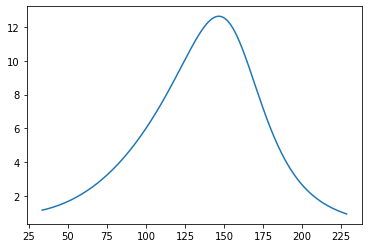

In [37]:
plt.plot(T_,func (T_,8.91844815e-01, 1.98205230e-05, 2.70572811e+00, 4.05039795e-04, 3.05975869e+02, 3.79708942e-01, 3.06022736e+02))

In [38]:
from matplotlib import rc
rc('font',**{'family':'serif'})
rc('text', usetex=True)
rc('text.latex', preamble='\\usepackage[utf8]{inputenc}')
rc('text.latex', preamble='\\usepackage[russian]{babel}')

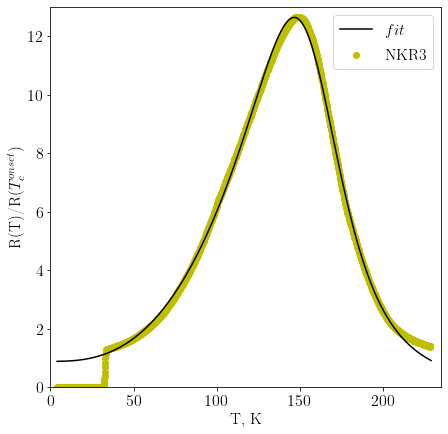

In [51]:
plt.figure(figsize=(7,7))
mpl.rcParams['font.size'] = 16
plt.ylabel("R(T)/R($T_c^{onset}$) ")
plt.xlabel("T, K")
x = np.linspace(4, 229,1497)
plt.ylim( 0, 13)
plt.xlim( 0, 235)

plt.scatter(T,R/0.794, color="y", label="NKR3")
plt.plot(x,func(x,8.91844530e-01, 1.98205238e-05, 2.70572812e+00, 4.05040333e-04, 3.05975915e+02, 3.79815356e-01, 3.05956213e+02), 'k', label="$fit$")

#save_results_to = '/Users/anastasiailina/Desktop/jupiter/'
plt.legend()
plt.savefig(save_results_to + "NKR3.png", dpi = 300)
plt.legend()
plt.show()